In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.datasets import make_blobs

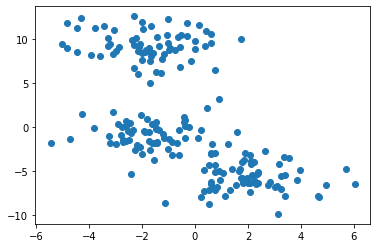

In [189]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=1.5)

plt.scatter(X[:,0], X[:,1])

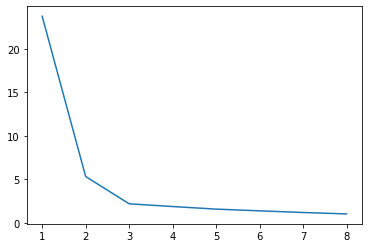

[23.745792404950567, 5.3359842198557965, 2.20142204986846, 1.8859521632029899, 1.5876890966019301, 1.3905202502326868, 1.200745624781895, 1.0371264672356018]


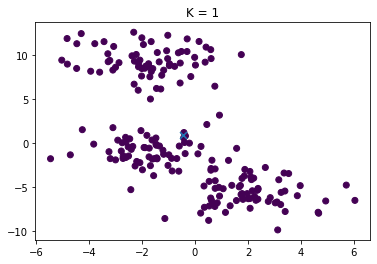

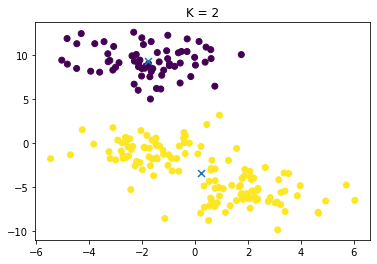

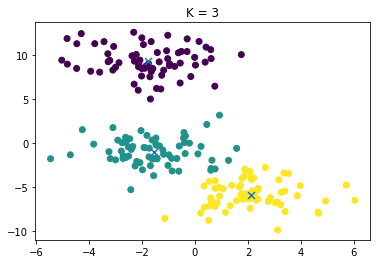

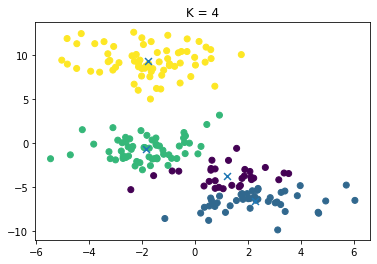

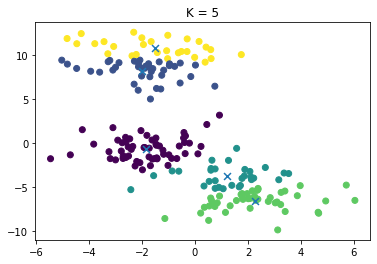

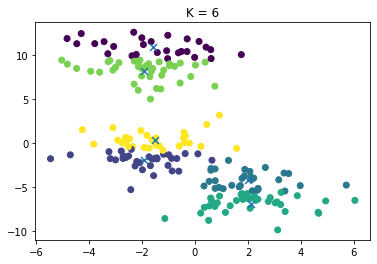

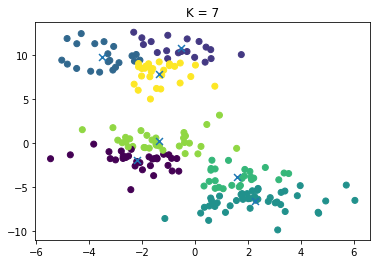

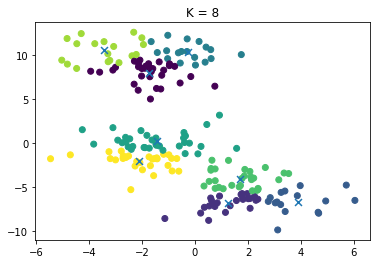

In [190]:
def k_means(data, k=2, tolerance=0.1, max_iter=500):
    data = data.copy()
    n_samples = data.shape[0]
    n_features = data.shape[1]
    distortions = []

    for i in range(100):
        centroids = np.array([random.choice(data) for _ in range(k)])

        # Update centroids till convergence or max iter reached
        for _ in range(max_iter):
            distances = []
            for centroid in centroids:
                dist_from_centroid = np.linalg.norm(data - centroid, axis=1)
                distances.append(dist_from_centroid)

            distances = np.array(distances).T

            labels = np.argmin(distances, axis=1)

            new_centroids = []
            for idx, centroid in enumerate(centroids):
                centroid_pts = data[labels == idx]
                if not len(centroid_pts):
                    new_centroids.append(centroid)
                else:
                    new_centroids.append(np.mean(centroid_pts, axis=0))

            new_centroids = np.array(new_centroids)

            if (centroids == new_centroids).all():
                break

            centroids = np.array(new_centroids)


        # Compute distortion at end of training epoch for converged centroids
        data_diff_centroids = np.empty((n_samples, n_features))
        for idx, centroid in enumerate(centroids):
            pts_idxs = labels == idx
            centroid_pts = data[pts_idxs]
            if not len(centroid_pts):
                continue
            data_diff_centroids[pts_idxs] = centroid_pts - centroid


        distortion = (np.abs(data_diff_centroids) ** 2).mean()
        distortions.append((distortion, centroids, labels))


    # Return minimum distortion & corresponding centroids from all epochs
    min_dist, centroids, labels = min(distortions, key=lambda d: d[0])
    return min_dist, centroids, labels


k_vals = [1, 2, 3, 4, 5, 6, 7, 8]
min_distortions = []
best_centroids = []
labels_per_k = []

for k in k_vals:
    dist, centroids, labels = k_means(X, k)

    min_distortions.append(dist)
    best_centroids.append(centroids)
    labels_per_k.append(labels)

plt.plot(k_vals, min_distortions)
plt.show()
print(min_distortions)

for idx, centroid_pts in enumerate(best_centroids):
    plt.scatter(X[:,0], X[:,1], c=labels_per_k[idx])
    plt.scatter(centroid_pts[:,0], centroid_pts[:,1], marker='x', s=48)
    plt.title(f'K = {k_vals[idx]}')
    plt.show()
